<a href="https://colab.research.google.com/github/SrMouraSilva/Aprendizagem-probabilistica/blob/main/Trabalho_3_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Por favor, veja esse arquivo online em: https://colab.research.google.com/drive/12a2rHvlfnl8tyf-EH9LSiUCSlC1zYLDW?usp=sharing

In [ ]:
# Programação simbólica
import sympy as sp
from sympy.plotting import plot, plot3d
 
# Exibir símbolos nas células
from google.colab.output._publish import javascript
url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.2/latest.js?config=default"
 
javascript(url=url)
from IPython.display import Math
 
# Manipulação dos dados
import numpy as np
import pandas as pd
 
# Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
 
import seaborn as sns
sns.set_theme()

In [ ]:
# Ajustes nas configurações padrões dos plots
mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

Universidade Federal do Ceará
* **Disciplina**: TÓPICOS AVANÇADOS EM APRENDIZAGEM DE MÁQUINA / TÓPICOS ESPECIAIS EM LÓGICA II
* **Código**: CK0255/CKP8377
* **Professores**: João Paulo P. Gomes / César Lincoln C. Mattos
* **Semestre**: 2020.2
* **Discente**: Paulo Mateus M. da Silva
* **Matrícula**: 486351
* **Curso**: Ciência da Computação

# Trabalho 3

> **Leia as instruções:**
> 
> * O trabalho é individual.
> * As simulações poderão ser realizadas em quaiquer linguagens de programação.
> * Para a avaliação do trabalho deverá ser submetido um arquivo pdf com texto e figuras referentes aos
resultados das simulações.
> * Para a avaliação do trabalho deverão ser enviados os códigos fonte.


## Item 1. Implemente um modelo de Naive Bayes (abordagem Bayesiana) para os dados disponı́veis em `votes_dataset.csv`.

* Os dados consistem nos votos (atributos binários) de deputados dos EUA [em projetos de lei ou algo similar]. A tarefa é prever se
um determinado deputado é democrata ou republicano com base nos seus votos.
* Apresente a matriz de confusão para os dados de teste.

### Arquivo `votes_dataset.csv`

**Obs**: Adicionei uma linha cabeçalho

In [ ]:
#@markdown
import csv
from io import StringIO

votes_dataset = """
republican,0,1,0,1,1,1,0,0,0,1,0,1,1,0,0,1
republican,0,1,0,1,1,1,0,0,0,0,0,1,1,0,0,1
democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0
democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,0,1,1
democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1
democrat,0,1,0,1,1,1,0,0,0,0,0,0,1,0,1,1
republican,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1
republican,0,1,0,1,1,1,0,0,0,0,0,1,1,0,0,1
democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,1
republican,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0
republican,0,1,0,1,1,1,0,0,0,0,1,0,1,0,0,1
democrat,0,1,1,0,0,0,1,1,1,0,0,0,1,1,0,1
democrat,1,1,1,0,0,1,1,1,0,1,1,0,0,1,1,1
republican,0,1,0,1,1,1,0,0,0,0,0,1,1,0,0,1
republican,0,1,0,1,1,1,0,0,0,1,0,1,1,0,0,1
democrat,1,0,1,0,0,1,0,1,0,1,1,1,1,0,0,1
democrat,1,0,1,0,0,0,1,1,1,0,0,0,1,1,1,1
republican,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0
democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,1,1,1
democrat,1,1,1,0,0,1,1,1,0,0,1,0,0,1,1,1
democrat,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,1
democrat,1,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1
democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,1,1,1
democrat,1,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1
democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,1,1,1
democrat,1,0,1,0,0,0,1,1,1,0,1,0,0,1,1,1
democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,1,1,1
republican,1,0,0,1,1,0,1,1,1,0,0,1,1,1,0,1
democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,1,1,1
republican,0,1,0,1,1,1,0,0,0,0,0,1,1,0,0,0
democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,1,1,1
democrat,1,1,1,0,0,0,1,1,1,1,0,0,1,1,1,1
republican,0,1,0,1,1,1,0,0,0,0,0,1,1,0,0,1
democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,1,1,1
republican,0,1,0,1,1,1,0,0,0,0,0,1,1,0,0,0
republican,1,0,0,1,1,1,0,0,0,1,0,1,1,0,0,1
republican,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1
republican,0,1,0,1,1,1,0,0,0,1,0,1,1,0,0,0
democrat,1,0,1,0,0,0,1,1,1,1,1,0,1,1,1,1
democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,1
democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,1,1,1
democrat,1,0,1,0,0,0,1,1,1,0,0,0,0,1,0,1
democrat,1,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1
democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,1,0,1
democrat,1,1,1,0,0,0,1,1,0,0,1,0,0,1,1,1
democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,1
democrat,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1
democrat,1,1,1,0,0,0,1,1,0,0,0,0,0,1,0,1
republican,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0
democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,1,1,1
republican,0,1,0,1,1,1,0,1,0,0,0,1,1,0,0,1
democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,1
republican,1,1,0,1,1,1,0,0,0,1,0,1,1,0,0,0
democrat,1,1,1,0,0,1,1,1,0,0,1,1,0,1,0,1
republican,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,0
republican,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,1
republican,0,1,0,1,1,1,0,0,0,1,0,1,1,0,0,1
republican,0,1,0,1,1,1,0,0,0,1,0,1,1,0,0,1
republican,0,1,0,1,1,1,0,0,0,1,0,1,1,0,0,1
democrat,1,1,1,0,0,1,1,1,1,1,0,0,0,1,1,1
republican,0,1,0,1,1,1,0,0,0,0,0,1,1,0,0,0
democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,1
democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,1,0,1
democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,1,0,1
republican,1,1,0,1,1,1,1,0,0,0,0,1,1,1,0,1
republican,0,1,0,1,1,1,1,0,0,0,1,1,1,1,0,1
republican,0,1,0,1,1,1,0,0,0,1,0,1,1,0,0,0
democrat,1,0,1,0,0,0,1,1,1,0,0,0,1,1,1,1
democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,1,1,1
democrat,1,0,1,0,0,0,1,1,1,0,0,0,1,1,1,1
republican,1,1,1,1,0,0,1,1,1,1,1,0,0,1,0,1
democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,1,1,1
republican,1,0,1,1,1,0,1,0,1,1,0,0,1,1,0,1
democrat,1,0,1,0,0,1,1,1,1,1,1,0,0,1,1,1
democrat,0,1,1,1,1,1,0,0,0,1,1,0,1,0,0,0
democrat,0,1,1,0,1,1,0,0,0,1,1,1,1,0,0,1
democrat,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1
democrat,1,1,1,0,1,1,0,0,0,1,1,0,1,0,0,1
republican,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0
democrat,1,0,1,0,0,1,1,1,1,1,0,1,0,1,0,1
democrat,1,0,1,0,0,0,1,1,0,1,1,1,0,1,0,1
republican,0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,1
republican,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0
republican,0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,0
democrat,0,0,1,0,1,1,0,0,0,1,1,1,1,0,0,1
republican,0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,0
republican,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0
democrat,0,1,1,0,1,1,1,0,1,1,1,0,1,1,0,1
republican,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,1
democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,1,1,1
democrat,1,0,1,0,0,0,1,1,1,1,1,0,0,1,1,1
democrat,1,1,1,0,0,0,1,1,0,1,1,0,0,1,1,1
democrat,1,0,1,0,0,0,1,0,1,1,1,0,0,1,1,1
democrat,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1
democrat,1,0,1,0,1,1,0,1,0,0,1,0,1,0,1,1
democrat,0,0,1,0,1,1,0,0,0,0,1,1,1,0,0,1
democrat,1,0,0,0,1,1,1,0,0,1,1,0,0,1,0,1
democrat,1,1,1,0,0,1,1,1,1,1,0,0,0,1,0,1
republican,0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,0
democrat,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1
democrat,1,0,1,0,1,1,1,0,0,0,1,0,0,1,0,1
democrat,1,0,1,0,1,1,1,0,0,0,1,0,1,1,1,1
democrat,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0
democrat,0,0,1,0,0,1,1,1,1,1,0,0,1,1,0,1
democrat,1,1,1,0,0,0,0,1,1,0,1,0,0,0,1,1
republican,0,1,0,1,1,1,0,0,0,0,0,1,1,0,0,1
republican,0,0,1,0,1,1,1,1,0,1,0,0,1,1,0,1
democrat,1,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1
democrat,1,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1
democrat,0,0,1,0,0,0,1,1,1,1,0,0,0,1,1,1
republican,0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,1
democrat,0,0,1,0,0,1,1,1,0,1,0,0,0,1,1,1
republican,0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,0
democrat,1,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1
democrat,0,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1
democrat,1,0,1,0,0,0,1,1,1,0,1,0,0,1,1,1
republican,1,1,1,1,1,0,1,0,0,0,0,1,1,1,0,1
democrat,0,1,1,0,0,0,0,1,1,1,1,0,0,0,1,1
republican,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0
republican,0,0,1,1,1,1,0,0,0,1,0,1,1,0,0,1
republican,0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,1
republican,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,1
republican,1,0,0,1,1,1,0,1,0,0,0,1,1,0,0,1
democrat,0,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1
republican,0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,1
republican,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0
democrat,0,0,1,0,0,0,1,1,1,1,1,0,0,1,1,1
democrat,0,0,1,0,0,1,0,1,0,1,1,0,0,0,1,1
democrat,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,1
democrat,1,0,1,0,1,1,1,1,1,0,0,0,0,1,1,1
democrat,0,0,1,0,0,1,0,1,1,1,0,0,0,0,0,1
republican,0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,1
republican,0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,1
republican,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,1
republican,0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,0
republican,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,1
democrat,0,0,1,0,0,1,1,1,1,1,0,0,0,1,1,1
democrat,0,0,1,0,0,1,1,1,1,1,0,0,0,1,0,1
democrat,1,0,1,0,0,1,1,1,1,0,0,0,0,1,1,1
republican,0,0,0,1,0,0,1,1,1,1,0,0,1,1,0,1
republican,0,0,0,1,1,1,1,1,1,1,0,1,1,1,0,1
republican,0,0,0,1,1,1,1,1,1,1,0,1,1,1,0,1
democrat,0,1,0,0,0,0,1,1,1,1,1,0,0,1,1,1
democrat,0,0,0,0,0,1,1,1,1,1,0,0,0,1,0,1
democrat,0,0,1,0,0,1,1,1,1,1,0,0,0,1,0,1
republican,0,1,0,1,1,1,0,0,0,0,0,1,1,0,0,1
democrat,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1
republican,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,1
democrat,0,0,1,0,0,0,1,1,1,1,0,0,1,1,1,1
republican,1,1,0,1,1,1,0,0,0,1,0,1,1,0,0,1
democrat,1,1,1,1,1,1,0,0,1,0,1,0,1,0,0,0
democrat,0,1,1,0,0,1,0,1,1,1,1,0,1,0,1,1
democrat,0,0,1,0,0,1,1,1,1,1,1,0,1,1,0,1
republican,0,1,0,1,1,1,0,0,0,0,0,1,1,0,0,0
republican,1,1,0,1,1,1,0,1,0,0,1,1,1,0,0,0
republican,1,1,0,1,1,1,1,0,0,0,0,1,1,1,0,0
democrat,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,1
republican,0,1,0,1,1,1,0,0,0,1,0,1,1,0,0,0
democrat,0,1,1,0,1,1,1,1,1,1,1,0,0,1,0,1
democrat,0,1,0,0,1,1,0,0,0,0,0,1,1,0,1,1
democrat,0,0,0,0,1,1,1,0,0,0,0,1,1,1,0,1
democrat,0,1,1,0,1,1,1,0,0,0,1,1,1,1,0,1
republican,0,1,0,1,1,1,1,0,0,0,0,1,1,1,0,1
democrat,1,1,0,0,1,1,0,0,0,1,1,1,1,0,0,1
democrat,0,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1
republican,1,0,1,1,1,1,1,1,0,1,0,1,0,1,1,1
republican,1,0,1,1,1,1,1,1,0,1,1,1,0,1,1,1
democrat,0,0,1,1,1,1,0,0,1,0,0,0,1,0,1,1
democrat,1,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1
democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,1,1,1
republican,0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,1
democrat,0,1,1,0,0,0,1,1,1,1,0,0,1,1,1,1
democrat,0,0,0,0,1,1,0,0,0,1,1,1,1,0,0,1
democrat,1,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1
democrat,0,1,1,0,0,0,1,1,1,1,0,0,0,1,1,1
republican,0,0,1,1,0,0,1,1,1,1,0,0,0,1,1,1
democrat,0,0,1,0,0,0,1,1,1,1,1,0,0,1,1,1
democrat,0,0,1,0,0,0,1,1,1,1,1,0,0,1,1,1
democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,1,1,1
democrat,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1
democrat,0,0,1,0,0,0,1,1,1,1,1,0,0,1,1,1
democrat,1,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1
democrat,0,0,1,0,1,1,1,1,1,1,0,0,1,1,0,1
democrat,0,0,1,0,0,0,1,1,1,1,1,0,0,1,1,1
democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,1,1,1
democrat,0,1,1,0,0,0,1,1,1,1,1,0,0,1,1,1
democrat,1,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1
republican,1,0,0,1,1,1,1,1,0,0,0,1,1,1,0,1
democrat,1,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1
republican,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,1
republican,0,1,0,1,1,1,0,1,0,1,0,1,1,0,0,1
democrat,0,0,0,0,0,1,1,1,1,0,1,0,0,1,1,1
democrat,0,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1
democrat,0,0,1,0,0,1,1,1,1,1,1,0,0,1,1,1
republican,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,1
democrat,0,0,1,0,0,1,1,1,1,0,1,1,0,1,1,1
republican,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,1
democrat,0,0,1,0,0,0,1,1,1,1,1,0,1,1,1,1
democrat,1,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1
democrat,0,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1
democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,1,1,1
democrat,1,0,1,0,0,1,1,1,1,1,1,0,0,1,1,1
democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,1,1,1
republican,0,0,1,1,1,1,1,0,0,0,0,1,1,1,0,1
democrat,0,0,1,0,0,1,1,1,1,1,0,1,0,1,0,1
republican,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,1
republican,1,0,0,1,1,1,1,0,0,1,0,1,1,1,0,1
democrat,0,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1
democrat,1,1,1,0,0,0,1,1,1,1,1,0,0,1,0,1
democrat,0,0,1,0,0,1,1,1,1,0,0,0,0,1,1,1
republican,0,1,0,1,1,1,0,0,0,1,0,1,1,0,0,1
democrat,0,0,1,0,0,0,1,1,1,0,1,0,0,1,1,1
democrat,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,1
republican,1,1,0,1,1,1,0,0,0,1,0,1,1,0,0,1
democrat,0,1,1,1,1,1,0,0,0,1,1,1,1,0,1,1
democrat,1,1,1,0,1,1,0,0,0,1,0,0,0,0,1,1
republican,0,1,0,1,1,1,0,0,0,1,0,1,1,0,0,0
democrat,1,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1
democrat,0,1,1,0,0,0,0,1,1,0,1,0,0,0,1,1
democrat,0,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1
democrat,0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1
democrat,1,0,1,0,0,0,1,1,1,0,1,0,0,1,1,1
republican,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1
republican,0,1,0,1,1,1,0,0,0,1,0,0,1,0,0,0
republican,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,1
democrat,0,0,1,0,0,1,1,1,1,0,1,0,0,1,1,1
democrat,1,0,1,0,0,0,1,1,1,0,0,0,0,1,0,1
republican,0,1,0,1,1,1,0,0,0,0,0,1,1,0,0,1
republican,0,1,1,1,1,1,1,0,1,1,0,1,1,1,0,1
republican,0,1,0,1,1,1,0,0,0,0,0,1,1,0,0,1
republican,0,1,0,1,1,1,0,0,1,1,0,1,1,0,0,1
democrat,0,1,1,0,0,0,1,1,0,0,1,0,0,1,1,1
republican,0,1,0,1,1,1,0,0,0,1,0,1,1,0,0,1
democrat,0,0,1,0,0,1,1,1,1,1,0,1,0,1,1,1
republican,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,1
democrat,0,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1
democrat,1,0,1,0,0,1,1,1,0,0,0,1,1,1,0,1
democrat,1,1,1,0,0,0,1,1,0,1,0,0,0,1,1,1
republican,0,0,0,1,1,1,1,0,0,1,0,0,0,1,1,1
republican,0,0,0,1,0,1,1,1,1,0,0,1,1,1,0,1
democrat,1,0,1,0,0,0,1,1,1,1,1,0,0,1,1,1
republican,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1
democrat,0,1,1,0,0,0,1,1,0,1,0,0,1,1,1,1
democrat,1,0,1,0,0,0,0,1,1,1,0,0,0,0,1,1
democrat,1,0,1,0,0,0,1,1,1,1,1,0,0,1,1,1
democrat,0,0,1,0,1,0,1,1,1,0,0,0,0,1,0,1
republican,0,1,0,1,1,1,1,0,0,0,0,0,1,1,0,0
republican,0,0,1,0,1,1,1,1,0,1,0,0,1,1,0,1
democrat,1,0,1,0,0,0,1,1,0,0,1,0,0,1,1,1
republican,0,1,0,1,1,1,0,0,0,0,0,1,1,0,0,0
republican,0,1,0,1,1,1,0,0,0,0,0,1,1,0,0,0
democrat,1,1,1,0,0,1,1,1,1,0,0,0,0,1,1,1
republican,0,1,0,1,1,1,0,0,0,0,0,1,1,0,0,1
democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1
democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,1,1,1
republican,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
republican,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
democrat,0,0,1,0,0,0,1,1,1,0,1,0,0,1,1,1
democrat,1,0,1,0,0,0,1,1,1,0,0,0,0,1,0,1
democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1
democrat,1,0,1,0,0,1,1,1,1,0,0,0,0,1,0,1
democrat,1,0,1,0,0,0,1,1,1,1,0,0,1,1,1,1
democrat,1,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1
democrat,1,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1
democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1
republican,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,1
republican,1,0,0,0,0,0,1,1,1,1,0,0,0,1,0,1
democrat,1,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1
democrat,1,0,1,0,0,0,1,1,1,0,0,0,0,1,0,1
democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,1,1,1
democrat,0,1,1,0,0,1,1,1,1,0,0,0,0,1,0,1
democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,1,1,1
republican,0,0,0,1,1,0,1,1,0,1,0,1,1,1,0,1
republican,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1
democrat,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0
republican,0,0,0,1,1,1,0,0,0,0,0,1,1,0,1,0
republican,0,0,1,1,1,1,1,1,0,1,0,0,0,1,0,1
republican,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,1
republican,0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,0
democrat,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1
republican,1,0,1,1,1,1,1,1,0,0,0,0,0,1,0,1
republican,1,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0
republican,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,1
democrat,0,0,1,0,0,1,1,1,1,1,1,0,0,1,0,1
democrat,0,0,1,0,0,1,1,1,1,1,1,0,0,1,1,1
democrat,0,0,1,0,0,1,1,1,0,1,1,1,0,1,1,1
democrat,1,1,1,0,0,1,1,1,1,0,1,0,1,1,0,1
democrat,1,1,1,0,1,1,0,1,0,1,1,0,1,0,1,1
democrat,1,1,1,0,1,1,0,1,0,1,1,0,1,0,0,1
democrat,1,0,1,0,1,1,1,1,1,1,0,0,1,1,0,1
democrat,1,0,1,0,0,1,1,1,1,1,0,0,0,1,0,1
democrat,1,0,1,0,0,1,1,1,0,1,1,0,1,1,1,1
democrat,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1
democrat,0,1,1,0,0,1,1,1,0,1,1,0,1,1,0,1
republican,0,1,0,1,1,1,1,1,0,1,0,1,1,1,0,1
republican,0,0,1,1,1,1,0,0,0,1,0,1,1,0,1,1
democrat,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,1
democrat,0,1,0,0,0,0,1,1,1,1,1,0,0,1,1,1
democrat,0,1,1,0,0,1,1,1,1,1,0,0,1,1,1,1
republican,0,0,0,1,1,0,1,1,1,1,0,1,1,1,0,1
democrat,0,0,1,0,0,1,1,1,1,0,0,0,0,1,1,1
republican,0,0,0,1,1,1,1,0,0,1,0,1,1,1,0,1
republican,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0
republican,0,1,0,1,1,1,0,0,0,1,0,1,1,0,0,1
republican,0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,0
republican,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0
democrat,1,0,1,0,0,1,1,1,1,0,0,0,0,1,0,1
republican,0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,0
democrat,1,0,0,0,0,1,1,1,1,1,0,0,0,1,1,1
republican,0,0,0,1,1,1,0,0,0,1,0,1,1,0,1,0
democrat,0,0,1,0,0,1,1,1,1,1,0,0,1,1,0,1
democrat,1,1,1,0,0,0,1,1,1,1,0,0,0,1,1,1
republican,0,1,1,1,1,1,0,0,0,1,0,1,1,0,0,1
republican,0,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1
republican,0,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1
democrat,0,0,0,0,0,1,0,1,1,0,1,1,1,0,1,0
democrat,1,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1
democrat,0,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1
democrat,1,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1
democrat,0,1,1,0,0,1,0,1,1,1,0,0,1,0,0,1
democrat,1,1,1,0,0,0,1,1,1,1,0,0,1,1,0,1
democrat,1,1,1,0,1,1,0,1,0,0,1,0,1,0,0,1
democrat,1,1,1,0,1,1,0,1,0,1,0,0,1,0,0,1
republican,0,1,0,1,1,1,0,0,0,0,1,1,1,0,0,0
democrat,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0,1
democrat,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,1
republican,0,1,0,1,1,1,0,0,0,0,0,1,1,0,0,1
democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,1,0,1
democrat,1,0,1,0,0,1,1,1,1,1,0,0,0,1,1,1
republican,0,1,0,1,1,1,0,0,0,1,0,1,1,0,0,0
democrat,1,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1
democrat,1,0,1,0,0,0,1,1,1,0,1,0,0,1,1,1
democrat,0,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1
democrat,0,1,1,0,0,1,1,1,0,0,1,1,0,1,1,1
republican,0,0,0,1,1,1,0,0,0,1,1,1,1,0,0,1
democrat,0,0,1,0,0,1,1,1,0,0,1,0,0,1,0,1
democrat,1,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1
democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,1,1,1
republican,1,0,0,1,1,1,0,0,0,0,1,1,1,0,0,0
republican,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,1
democrat,0,0,1,0,0,1,1,1,1,1,1,0,1,1,1,1
democrat,0,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1
republican,0,0,0,1,1,0,1,0,1,1,0,0,0,1,0,1
democrat,0,0,1,0,0,0,1,1,1,1,1,0,0,1,1,1
republican,0,0,0,1,1,1,1,0,0,1,0,1,0,1,1,1
republican,0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,1
republican,1,0,0,1,1,1,0,0,0,1,0,1,1,0,0,0
democrat,1,0,1,0,0,0,1,1,1,1,0,1,0,1,1,1
republican,0,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1
democrat,0,1,0,0,0,1,1,0,1,0,1,0,0,1,1,1
republican,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1
democrat,0,1,0,1,0,1,1,1,1,0,1,0,1,1,1,1
republican,0,0,1,1,1,1,1,0,0,1,1,1,1,1,0,1
democrat,0,1,1,0,0,1,1,1,1,1,0,0,0,1,1,1
republican,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1
republican,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0
republican,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0
democrat,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1
republican,0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,1
democrat,1,0,1,0,0,1,1,1,1,1,0,0,1,1,0,1
democrat,1,0,1,0,1,1,1,0,1,1,0,0,1,1,0,1
democrat,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1
republican,1,1,0,1,1,1,0,0,0,1,1,0,1,0,0,0
republican,1,1,0,1,1,1,0,0,0,0,1,0,1,0,0,1
democrat,0,1,0,0,1,1,0,0,0,1,1,0,1,0,0,0
democrat,1,0,1,0,0,0,1,1,0,1,1,0,0,1,0,1
democrat,1,1,1,0,1,1,1,1,0,1,1,0,0,1,1,1
democrat,0,1,1,0,0,1,1,1,0,1,0,0,0,1,1,1
republican,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1
democrat,1,1,1,0,1,1,1,1,0,1,0,0,0,1,1,1
democrat,1,1,1,0,1,0,1,1,1,1,0,0,0,1,1,1
democrat,0,1,1,1,1,1,0,0,0,0,1,1,1,0,0,0
democrat,0,1,1,0,1,1,0,1,0,1,0,0,1,0,0,1
republican,0,1,0,1,1,1,0,0,0,0,0,1,1,0,0,1
democrat,0,1,0,1,1,1,0,0,0,0,1,1,0,0,0,0
democrat,1,0,1,0,0,0,1,1,1,0,1,0,0,1,1,1
republican,0,1,0,1,1,1,1,1,0,0,0,0,1,1,0,1
republican,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,1
republican,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,1
democrat,1,1,1,0,0,1,1,1,1,0,1,0,1,1,1,1
democrat,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,1
democrat,1,1,0,1,1,1,0,0,0,0,1,0,1,0,0,1
democrat,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1
democrat,1,1,1,1,1,1,0,0,0,0,1,1,1,0,0,1
democrat,1,1,0,0,1,1,0,0,0,0,1,1,1,0,1,0
democrat,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,1
democrat,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1
democrat,0,1,1,1,1,1,0,0,0,0,0,1,1,0,0,1
democrat,1,0,1,0,0,0,1,1,1,1,1,0,0,1,1,1
democrat,0,0,0,0,1,1,1,0,0,0,1,1,0,1,0,1
democrat,1,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0
republican,1,1,0,1,1,1,0,0,0,0,1,1,1,0,0,1
republican,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1
democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
democrat,1,1,1,0,0,0,0,1,0,0,1,0,0,0,1,1
democrat,1,1,1,0,1,1,0,1,0,0,1,0,1,0,1,1
democrat,1,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1
democrat,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1
republican,0,1,0,1,1,1,0,0,0,1,0,1,1,0,0,0
republican,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,1
republican,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,0
republican,0,0,1,1,0,1,1,1,1,1,0,1,0,1,0,1
republican,0,1,0,1,1,1,0,0,0,1,0,1,1,0,0,0
republican,1,1,0,1,1,1,0,0,0,1,0,1,1,0,0,1
republican,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,1
democrat,1,0,1,0,1,1,0,0,1,1,0,0,1,0,0,1
democrat,0,0,0,1,1,1,0,0,0,0,1,1,1,0,0,0
democrat,1,0,1,0,0,1,1,1,1,0,0,1,1,1,1,1
republican,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0
republican,0,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1
democrat,1,0,1,0,0,1,1,1,1,1,1,0,0,1,0,1
republican,0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,1
republican,1,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1
democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,1
democrat,0,1,1,0,0,1,1,1,0,1,0,0,0,1,0,1
republican,1,1,0,1,1,1,0,0,0,1,0,0,1,0,0,1
democrat,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1
democrat,1,1,1,0,0,0,1,1,0,1,0,0,0,1,0,1
democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,1
republican,1,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1
democrat,0,1,1,0,1,1,1,1,0,0,1,0,1,1,1,1
democrat,0,0,1,0,0,1,1,1,1,0,1,0,0,1,1,1
democrat,0,1,1,0,0,1,1,1,1,0,1,0,0,1,1,1
democrat,0,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1
democrat,0,0,1,0,0,0,1,1,0,1,1,0,0,1,1,1
democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,1,1,1
republican,0,0,0,1,1,1,1,1,0,1,0,1,1,1,0,1
democrat,0,0,1,0,0,0,1,1,1,1,0,0,1,1,1,1
democrat,1,0,1,0,1,0,1,1,1,1,0,1,0,1,1,1
republican,0,0,1,1,1,1,0,0,1,1,0,1,1,0,0,1
democrat,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1
republican,0,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1
republican,0,0,0,1,1,1,1,1,0,1,0,1,1,1,0,1
republican,0,1,0,1,1,1,0,0,0,1,0,1,1,0,0,0
"""

dataset_1 = pd.read_csv(StringIO(votes_dataset), names=['y'] + [f'x{i}' for i in range(16)])
dataset_1

,y,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,0,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,0,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,0,0,1,1,1,1,0,0,1,1,0,1,1,0,0,1
431,democrat,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1
432,republican,0,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1
433,republican,0,0,0,1,1,1,1,1,0,1,0,1,1,1,0,1


~~Vejamos a mesma informação em um gráfico de radar (gráfico polar)~~

### Implementação do modelo

#### `NaiveBayesBayesianoBinario`

`NaiveBayesBayesianoBinario`

* @param a: Vetor coluna de parâmetros `a` da distribuição Beta
* @param b: Vetor coluna de parâmetros `b` da distribuição Beta
* @param α: Parâmetros da distribuição Dirichlet. Defina como um vetor coluna

In [ ]:
class NaiveBayesBayesianoBinario:
    def __init__(self, a, b, α):
        """
        `NaiveBayesBayesianoBinario`
 
        @param a: Vetor coluna de parâmetros `a` da distribuição Beta
        @param b: Vetor coluna de parâmetros `b` da distribuição Beta
        @param α: Parâmetros da distribuição Dirichlet. Defina como um vetor coluna
        """
        self.a = a
        self.b = b
        self.α = α

        self.π = None
        self.θ = None

    def fit(self, X, y):
        N, D = X.shape

        df = pd.DataFrame(X, columns=[f'x{i}' for i in range(D)])
        df['y'] = y

        # Beta
        𝔼_beta = lambda Ndc, N: (Ndc + self.b) / (N + self.a + self.b)
       
        Ndc = df.groupby('y').sum().to_numpy().T

        self.θ = 𝔼_beta(Ndc, N).T

        # Dirichlet
        𝔼_dir = lambda Nc, N, α: (Nc + α) / (N + α.sum())

        Nc = df.groupby('y').size().to_numpy().reshape((-1, 1))

        self.π = 𝔼_dir(Nc, N, self.α)
    
    def predict(self, X):
        Ber = lambda k, p: (p**k) * (1-p)**(1-k)
        Σ = lambda x: np.sum(x, axis=1)
        log = np.log

        argmax = lambda a, b: (zeros < ones).astype(np.int0).reshape((-1, 1))

        zeros = log(self.π[0, 0]) + Σ(log(Ber(X, self.θ[0])))
        ones  = log(self.π[1, 0]) + Σ(log(Ber(X, self.θ[1])))
        
        return argmax(zeros, ones)

### Treinamento (estimação) do modelo

Após a separação dos dados em conjuntos de treino e de teste, iremos ver alguns gráficos do modelo referentes ao conjunto de treino, com o intuito de auxiliar na definição dos hiperparâmetros do modelo.

#### Separação do conjunto de dados: Treinamento e teste

O conjunto de dados foi separada em 80% para treinamento e 20% para teste.

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset_1[[f'x{i}' for i in range(16)]].to_numpy()
y = (dataset_1[['y']] == 'republican').to_numpy(dtype=np.int0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"""
Considerado 
 - y == 0: Democrat
 - y == 1: Republican

Tamanhos
- X_train: {X_train.shape}
- X_test: {X_test.shape}
- y_train: {y_train.shape}
- y_test: {y_test.shape} 
""".strip())

Considerado 
 - y == 0: Democrat
 - y == 1: Republican

Tamanhos
- X_train: (348, 16)
- X_test: (87, 16)
- y_train: (348, 1)
- y_test: (87, 1)


#### Visualizações para `votes_dataset.csv` (somente dados de treinamento)

Antes de definir os parâmetros do modelo, vamos ver alguns gráficos do modelo.

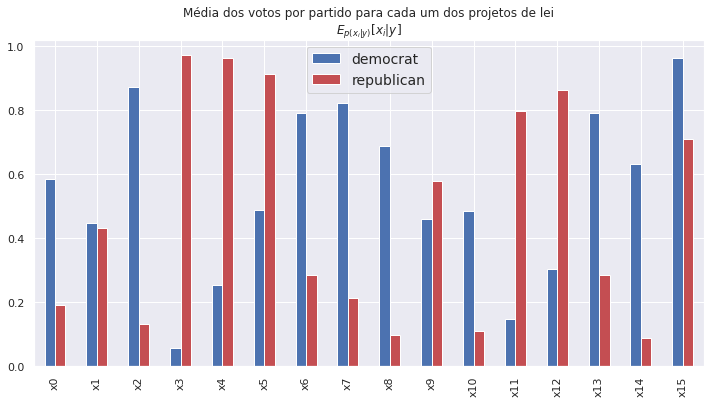

In [ ]:
def plot_colunas(X, y):
    N, D = X.shape

    df = pd.DataFrame(X, columns=[f'x{i}' for i in range(D)])
    df['y'] = y

    df.groupby('y').mean().T.plot.bar(
        title='Média dos votos por partido para cada um dos projetos de lei\n$E_{p(x_i|y)}[x_i|y]$',
        color=['b', 'r'],
        figsize=(12, 6),
    )
    plt.legend(['democrat', 'republican'])

plot_colunas(X_train, y_train)

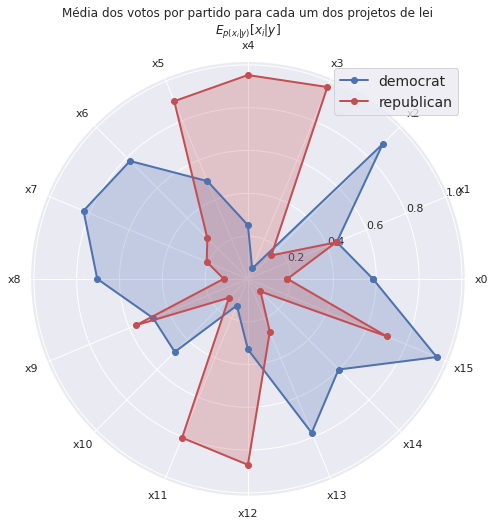

In [ ]:
def plot_radar(X, y):
    N, D = X.shape

    df = pd.DataFrame(X, columns=[f'x{i}' for i in range(D)])
    df['y'] = y

    # Baseado em: https://www.kaggle.com/typewind/draw-a-radar-chart-with-python-in-a-simple-way
    labels = [f'x{i}' for i in range(D)]

    stats_democrat, stats_republican = df.groupby('y').mean().values

    stats_democrat = np.concatenate((stats_democrat, [stats_democrat[0]]))
    stats_republican = np.concatenate((stats_republican, [stats_republican[0]]))

    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))

    fig = plt.figure()
    ax = fig.add_subplot(111, polar=True)

    ax.plot(angles, stats_democrat, 'o-', linewidth=2, color='b')
    ax.fill(angles, stats_democrat, alpha=0.25, color='b')
    ax.plot(angles, stats_republican, 'o-', linewidth=2, color='r')
    ax.fill(angles, stats_republican, alpha=0.25, color='r')

    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.set_title('Média dos votos por partido para cada um dos projetos de lei\n$E_{p(x_i|y)}[x_i|y]$')
    ax.grid(True)
    ax.legend(['democrat', 'republican'])

plot_radar(X, y)

In [ ]:
#@title Hiperparâmetros do modelo
#@markdown Defina os hiperparâmetros do modelo que serão utilizados.

#@markdown #### Parâmetros da priori (distribuição **Beta**)
#@markdown Defina quais os `x_d` que você considera que são mais propensos aos democratas.
#@markdown Insira separado por vírgula (`,`) e sem espaço.

x_d_mais_favoraveis_democrat = "x3,x4,x5,x11,x12" #@param {type:"string"}

#@markdown Defina quais os `x_d` que você considera que são mais propensos aos democratas.
#@markdown Insira separado por vírgula (`,`) e sem espaço.
x_d_mais_favoraveis_republican = "x2,x6,x7,x8,x13,x14" #@param {type:"string"}

#@markdown Defina os parâmetros `a` e `b` que serão aplicados
#@markdown às características em que você acha `republican`
#@markdown é mais favorável ao projeto de lei
a_republican =  2#@param {type: "number"}
b_republican =  3#@param {type: "number"}

#@markdown Defina os parâmetros `a` e `b` que serão aplicados
#@markdown às características em que você acha `democrat`
#@markdown é mais favorável ao projeto de lei
a_democrat =  3#@param {type: "number"}
b_democrat =  2#@param {type: "number"}

#@markdown Defina os parâmetros `a` e `b` que serão aplicados
#@markdown às características em que você acha
#@markdown que não há um favoritismo claro

#@markdown Defina `a` e `b` que serão aplicado aos que não trazem favoritismo.
a_sem_favoravel = 2 #@param {type: "number"}
b_sem_favoravel = 2 #@param {type: "number"}

#@markdown #### Parâmetros da posteriori (distribuição de **Dirichlet**)
#@markdown Defina os `α_c`:
α_0 = 2 #@param {type: "number"}
α_1 = 2 #@param {type: "number"}

###########################
binomial_θ = pd.DataFrame({
    'a': [a_sem_favoravel for d in range(16)],
    'b': [a_sem_favoravel for d in range(16)]
}, index=[f'x{d}' for d in range(16)])

x_d_democrat = x_d_mais_favoraveis_democrat.split(',')
x_d_republican = x_d_mais_favoraveis_republican.split(',')

for x_d in x_d_democrat:
    binomial_θ.loc[x_d].a = a_republican
    binomial_θ.loc[x_d].b = b_republican

for x_d in x_d_republican:
    binomial_θ.loc[x_d].a = a_democrat
    binomial_θ.loc[x_d].b = b_democrat

α = np.array([
    [α_0],
    [α_1],
])

In [ ]:
print("Parâmetros definidos")

Math(sp.latex(f"""
\\begin{{aligned}}
\\boldsymbol{{a}} &= {sp.latex(sp.Matrix(binomial_θ.a))}, ~~~~~~
\\boldsymbol{{b}} &= {sp.latex(sp.Matrix(binomial_θ.b))}, ~~~~~~
\\boldsymbol{{\\alpha}} &= {sp.latex(sp.Matrix(α))}.
\\end{{aligned}}
"""))

Parâmetros definidos


<IPython.core.display.Math object>

#### Treinamento

In [ ]:
modelo_1 = NaiveBayesBayesianoBinario(
    binomial_θ.a.to_numpy().reshape((-1, 1)),
    binomial_θ.b.to_numpy().reshape((-1, 1)),
    α
)
modelo_1.fit(X_train, y_train)

### Priori aprendida (responsabilidades / $\boldsymbol{{\pi}}$)

Responsabilidades estimadas a partir da base de treino:
$$
\hat{\pi} = \frac{N_c}{N}
$$

In [ ]:
Math(sp.latex(f"""
\\begin{{aligned}}
\\boldsymbol{{\\pi}} &= {sp.latex(sp.Matrix(modelo_1.π))}
\\end{{aligned}}
"""))

<IPython.core.display.Math object>

### Posteriori aprendida

In [ ]:
Math(sp.latex(f"""
\\begin{{aligned}}
\\boldsymbol{{\\theta}}_0 = {sp.latex(sp.Matrix(modelo_1.θ[0, :]))} ~~~~~~
\\boldsymbol{{\\theta}}_1 = {sp.latex(sp.Matrix(modelo_1.θ[1, :]))}.
\\end{{aligned}}
"""))

<IPython.core.display.Math object>

### Gráfico solicitado na questão

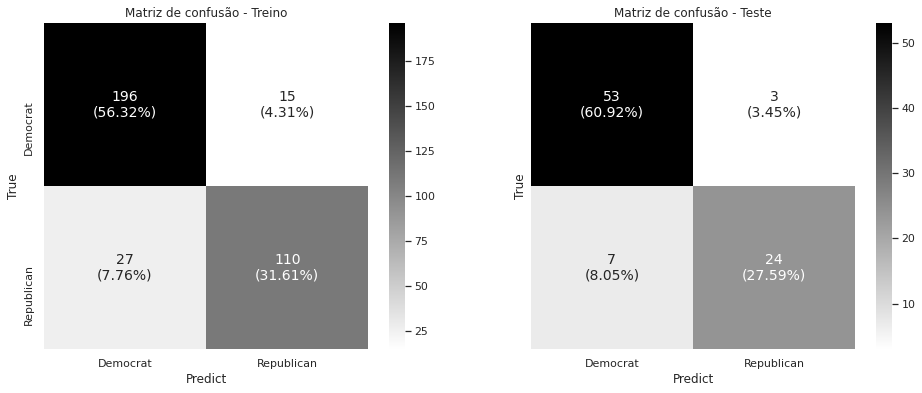

In [ ]:
# Baseado em: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
from sklearn.metrics import confusion_matrix

def plot_matriz_confusao(y_true, y_predict, title, ax=None):
    ax = ax if ax != None else plt.axes()

    matrix_confusao = confusion_matrix(y_true, y_predict)

    percentuais = ["{0:.2%}".format(value) for value in matrix_confusao.flatten()/np.sum(matrix_confusao)]
    labels = [f'{quantidade}\n({percentual})' for quantidade, percentual in zip(matrix_confusao.flatten(), percentuais)]
    
    sns.heatmap(
        matrix_confusao,
        annot=np.array(labels).reshape(matrix_confusao.shape),
        fmt='',
        cmap='binary',
        xticklabels=['Democrat', 'Republican'],
        yticklabels=['Democrat', 'Republican'],
        ax=ax
    )
    ax.set_ylabel('True')
    ax.set_xlabel('Predict')
    ax.set_title(title)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 6))
plot_matriz_confusao(y_train, modelo_1.predict(X_train), 'Matriz de confusão - Treino', ax=ax1)
plot_matriz_confusao(y_test, modelo_1.predict(X_test), 'Matriz de confusão - Teste', ax=ax2)

## Bônus: Utilização do modelo `NaiveBayesBinario`

Versão não Bayesiana:


`NaiveBayesBinario`: Naive Bayes não binário
$p(\boldsymbol{x}|y=c, \boldsymbol{\theta}) = \prod_{d=1}^D p(x_d|y=c, \boldsymbol{\theta}_{dc})$

Para atributos binários, utilizamos uma distribuição de Bernoulli:
$p(x_d|y=c, \boldsymbol{\theta}_{dc}) = Ber(x_d|\theta_dc)$

* @param π: Vetor coluna de probabilidades a priori das classes (i.e, $p(\boldsymbol{y})$
* @param η: Ruído para evitar que ocorra probabilidades zeros

In [ ]:
class NaiveBayesBinario:
    def __init__(self, π, η=1e-2):
        """
        `NaiveBayesBinario`: Naive Bayes não binário
        $p(\boldsymbol{x}|y=c, \boldsymbol{\theta}) = \prod_{d=1}^D p(x_d|y=c, \boldsymbol{\theta}_{dc})$

        Para atributos binários, utilizamos uma distribuição de Bernoulli:
        $p(x_d|y=c, \boldsymbol{\theta}_{dc}) = Ber(x_d|\theta_dc)$

        @param π: Vetor coluna de probabilidades a priori das classes (i.e, $p(\boldsymbol{y})$
        @param η: Ruído para evitar que ocorra probabilidades zeros
        """
        self.π = π
        self.η = η

        self.θ = None

    def fit(self, X, y):
        N, D = X.shape
        df = pd.DataFrame(X, columns=[f'x{i}' for i in range(D)])
        df['y'] = y

        self.θ = df.groupby('y').mean().to_numpy() + self.η
    
    def predict(self, X):
        Ber = lambda k, p: (p**k) * (1-p)**(1-k)
        Π = lambda x: np.prod(x, axis=1)
        argmax = lambda a, b: (zeros < ones).astype(np.int0).reshape((-1, 1))

        zeros = self.π[0, 0] * Π(Ber(X, self.θ[0]))
        ones  = self.π[1, 0] * Π(Ber(X, self.θ[1]))
        
        return argmax(zeros, ones)

### Treinamento (estimação) do modelo

- Foi utilizada a mesma separação do conjunto de dados

#### Priori considerada (responsabilidades / $\boldsymbol{{\pi}}$)

Responsabilidades estimadas a partir da base de treino:
$$
\hat{\pi}_c = \frac{N_c}{N}
$$

In [ ]:
π = np.array([
    [1 - y_train.mean()],
    [y_train.mean()]
])

Math(sp.latex(f"""
\\begin{{aligned}}
\\boldsymbol{{\\pi}} &= {sp.latex(sp.Matrix(π))}
\\end{{aligned}}
"""))

<IPython.core.display.Math object>

#### Treinamento

In [ ]:
modelo_2 = NaiveBayesBinario(π)
modelo_2.fit(X_train, y_train)

### Posteriori aprendida

In [ ]:
Math(sp.latex(f"""
\\begin{{aligned}}
\\boldsymbol{{\\theta}}_0 = {sp.latex(sp.Matrix(modelo_2.θ[0, :]))} ~~~~~~
\\boldsymbol{{\\theta}}_1 = {sp.latex(sp.Matrix(modelo_2.θ[1, :]))}.
\\end{{aligned}}
"""))

<IPython.core.display.Math object>

### Gráfico solicitado na questão

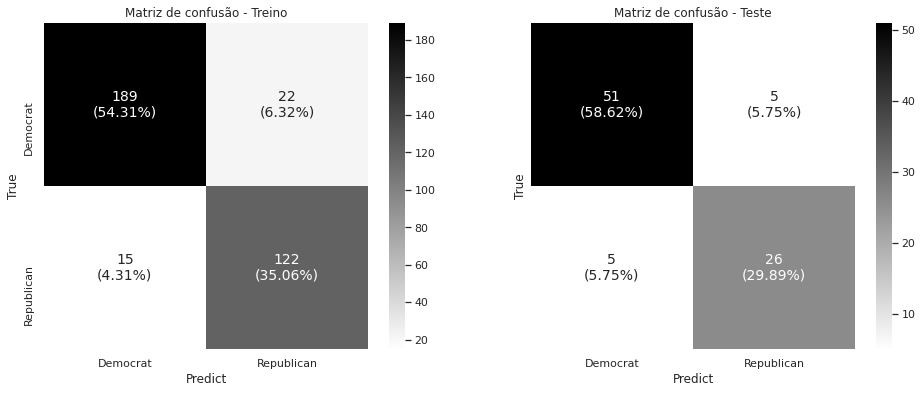

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 6))
plot_matriz_confusao(y_train, modelo_2.predict(X_train), 'Matriz de confusão - Treino', ax=ax1)
plot_matriz_confusao(y_test, modelo_2.predict(X_test), 'Matriz de confusão - Teste', ax=ax2)